### mushroom classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('mushrooms.csv')
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [3]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()
x.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


cap-shape_b    uint8
cap-shape_c    uint8
cap-shape_f    uint8
cap-shape_k    uint8
cap-shape_s    uint8
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 117, dtype: object

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
score = model.score(X_test, y_test)
score

1.0

#### visualization

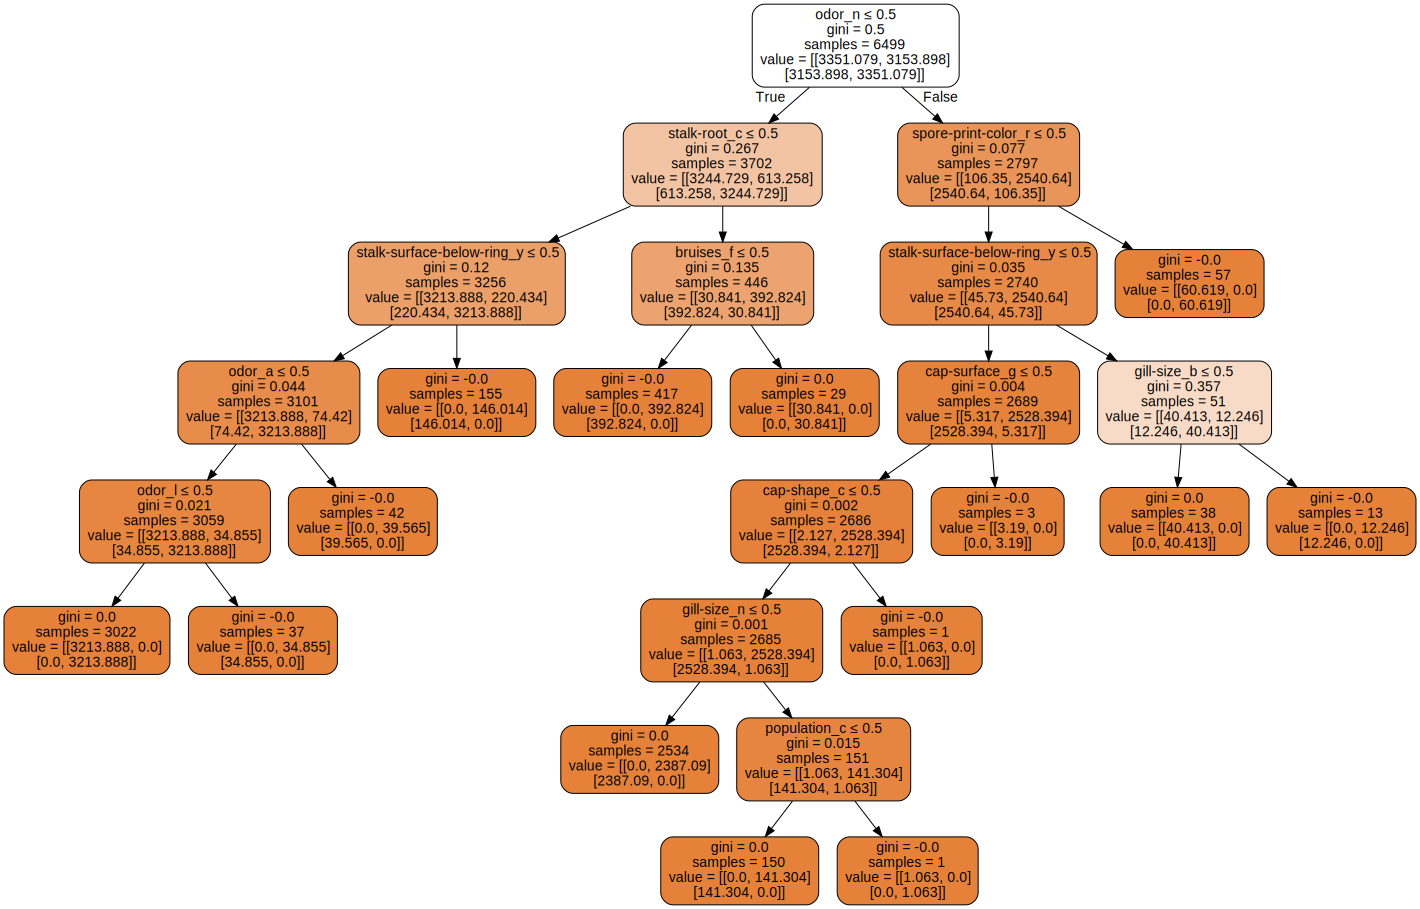

In [7]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph